### Instagram Impression Analysis


In [37]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [70]:
#import data
df = pd.read_csv("E:/ML_Projects/Instagram Impression Analysis/Instagram data.csv",encoding = 'latin1')

In [39]:
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [40]:
#Check for null values
df.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [41]:
df = df.dropna()

In [42]:
#Let’s have a look at the insights of the columns to understand the data type of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


### Analyzing Instagram Reach

F:\ANACONDA\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



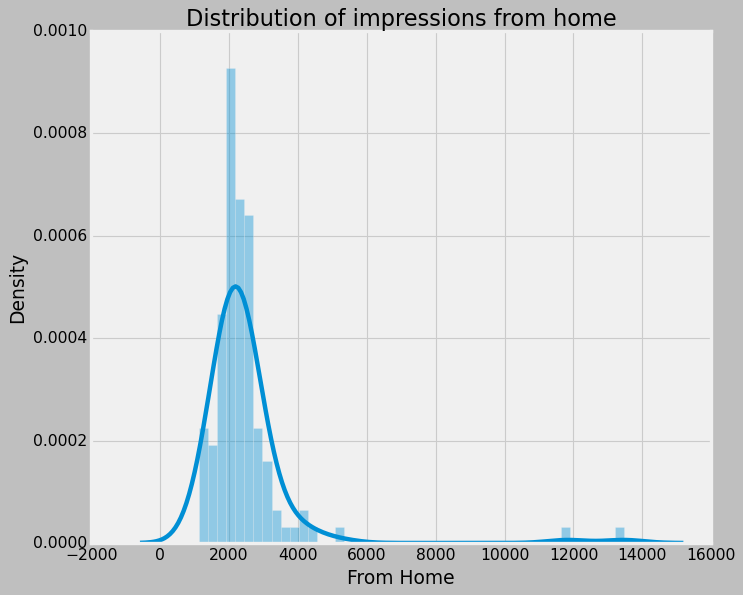

In [43]:
#first have a look at the distribution of impressions I have received from home

plt.figure(figsize=(10,8))
plt.style.use("fivethirtyeight")
plt.title("Distribution of impressions from home")
sns.distplot(df['From Home'])
plt.show()

In [44]:
# Looking at the impressions from home, we can say it’s hard to reach all the followers daily.

F:\ANACONDA\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



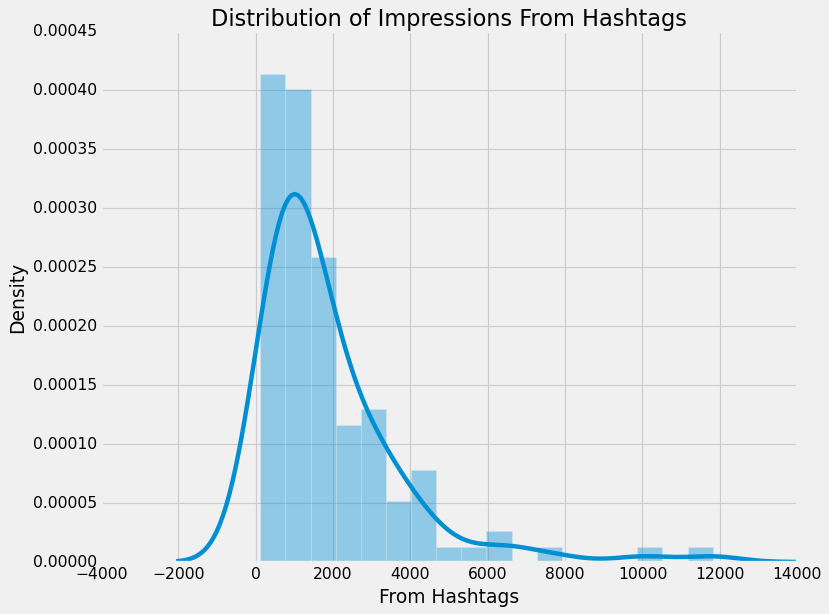

In [45]:
#let’s have a look at the distribution of the impressions  received from hashtags
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Hashtags")
sns.distplot(df['From Hashtags'])
plt.show()

In [46]:
#Looking at hashtag impressions shows that not all posts can be reached using hashtags, but many new users can be reached from hashtags.


F:\ANACONDA\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



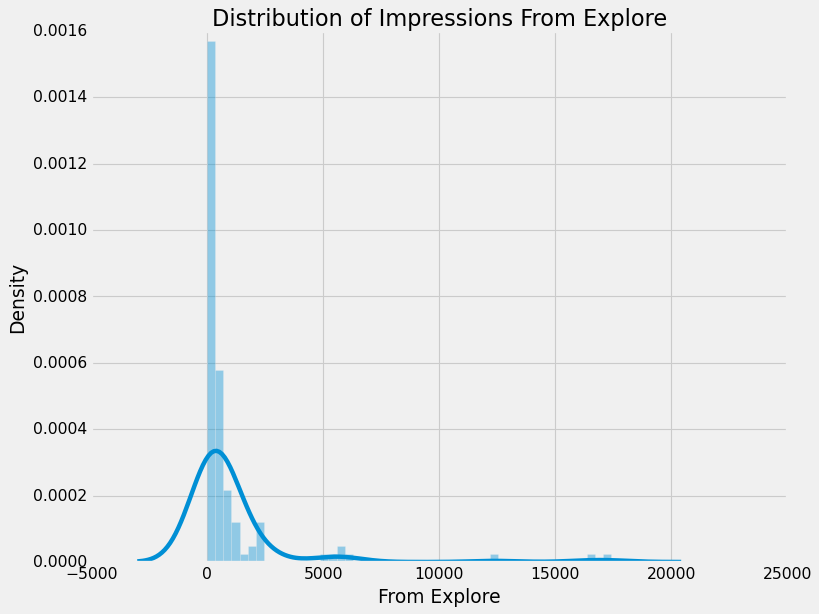

In [47]:
#let’s have a look at the distribution of impressions I have received from the explore section of Instagram
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Explore")
sns.distplot(df['From Explore'])
plt.show()

In [48]:
# By looking at the impressions I have received from the explore section, I can say that Instagram does not recommend our posts much to the users. Some posts have received a good reach from the explore section, 
# but it’s still very low compared to the reach I receive from hashtags.

In [49]:
#Now let’s have a look at the percentage of impressions I get from various sources on Instagram
home = df['From Home'].sum()
hashtags = df["From Hashtags"].sum()
explore = df["From Explore"].sum()
other = df["From Other"].sum()

labels = ['From Home','From Hashtags','From Explore','Other']
values = [home, hashtags, explore, other]

fig = px.pie(df,values=values, names=labels, title = "Impressions on instagram posts from various sources", hole=0.5)
fig.show()

### Analyzing Content

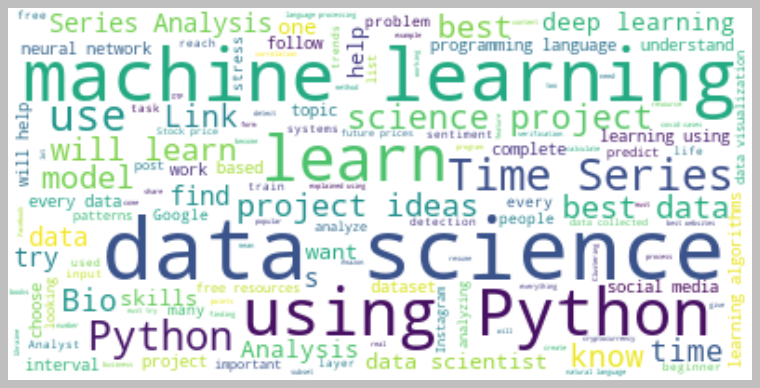

In [72]:
# Let’s create a wordcloud of the caption column to look at the most used words in the caption of my Instagram posts
text = " ".join(i for i in df.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

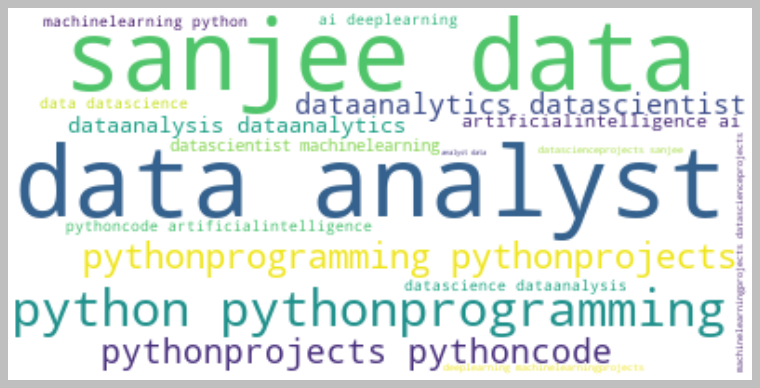

In [73]:
#let’s create a wordcloud of the hashtags column to look at the most used hashtags in my Instagram posts
text = " ".join(i for i in df.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Analyzing Relationships


In [52]:
#Let’s have a look at the relationship between the number of likes and the number of impressions on my Instagram posts
figure = px.scatter(data_frame = df, x="Impressions",
                    y="Likes", size="Likes", trendline="ols", 
                    title = "Relationship Between Likes and Impressions")
figure.show()

In [53]:
#There is a linear relationship between the number of likes and the reach I got on Instagram.

In [54]:
#Now let’s see the relationship between the number of comments and the number of impressions on my Instagram posts
figure = px.scatter(data_frame = df, x="Impressions",
                    y="Comments", size="Comments", trendline="ols", 
                    title = "Relationship Between Comments and Total Impressions")
figure.show()

In [55]:
#It looks like the number of comments we get on a post doesn’t affect its reach.

In [56]:
#Now let’s have a look at the relationship between the number of shares and the number of impressions
figure = px.scatter(data_frame = df, x="Impressions",
                    y="Shares", size="Shares", trendline="ols", 
                    title = "Relationship Between Shares and Total Impressions")
figure.show()

In [57]:
#A more number of shares will result in a higher reach, but shares don’t affect the reach of a post as much as likes do.

In [58]:
#Now let’s have a look at the relationship between the number of saves and the number of impressions
figure = px.scatter(data_frame = df, x="Impressions",
                    y="Saves", size="Saves", trendline="ols", 
                    title = "Relationship Between Post Saves and Total Impressions")
figure.show()

In [59]:
#There is a linear relationship between the number of times my post is saved and the reach of my Instagram post.

In [60]:
#Now let’s have a look at the correlation of all the columns with the Impressions column
correlation = df.corr()
print(correlation["Impressions"].sort_values(ascending=False))

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


In [61]:
#So we can say that more likes and saves will help you get more reach on Instagram. 
#The higher number of shares will also help you get more reach, but a low number of shares will not affect your reach either.

### Analyzing Conversion Rate

In [62]:
#In Instagram, conversation rate means how many followers you are getting from the number of profile visits from a post.
#The formula that you can use to calculate conversion rate is (Follows/Profile Visits) * 100. 
#Now let’s have a look at the conversation rate of my Instagram account:

conversion_rate = (df["Follows"].sum() / df["Profile Visits"].sum()) * 100
print(conversion_rate)

41.00265604249668


In [63]:
#So the conversation rate of my Instagram account is 41% which sounds like a very good conversation rate

In [64]:
#Let’s have a look at the relationship between the total profile visits and the number of followers gained from all profile visits
figure = px.scatter(data_frame = df, x="Profile Visits",
                    y="Follows", size="Follows", trendline="ols", 
                    title = "Relationship Between Profile Visits and Followers Gained")
figure.show()

In [65]:
#The relationship between profile visits and followers gained is also linear.

### Instagram Reach Prediction Model

In [66]:
# Tain a machine learning model to predict the reach of an Instagram post.
x = np.array(df[['Likes', 'Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']])
             
y = np.array(df["Impressions"])
             
xtrain, xtest, ytrain, ytest = train_test_split(x, y,test_size = 0.2, random_state = 42)

In [67]:
model = LinearRegression()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.8777977785012777

In [68]:
#Now let’s predict the reach of an Instagram post by giving inputs to the machine learning model
# Features = [['Likes','Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

array([11139.58239766])